## `pandas` par l'exemple

### Analyse des prénoms parisiens depuis 2004


#### Lecture & importation de fichier de données



Commençons par l'importation du module `pandas`



In [1]:
import pandas as pd

Nous allons nous intéresser dans ce *notebook* à l'historique des prénoms déclarés à l'état-civil de
2004 à 2019 sur la ville de Paris. Ces données sont téléchargeables depuis le site
[https://data.gouv.fr](https://data.gouv.fr) et, pour le fichier qui nous intéresse, à cette [adresse](https://www.data.gouv.fr/fr/datasets/r/30800be0-8b72-4e89-9ecf-58ea7dedfe86). Une fois le fichier
téléchargé

In [2]:
!wget https://www.data.gouv.fr/fr/datasets/r/30800be0-8b72-4e89-9ecf-58ea7dedfe86 -O data/liste_des_prenoms.csv

--2021-12-04 10:59:03--  https://www.data.gouv.fr/fr/datasets/r/30800be0-8b72-4e89-9ecf-58ea7dedfe86
SSL_INIT
Certificat de l’autorité de certification « /etc/ssl/certs/ca-certificates.crt » chargé
Résolution de www.data.gouv.fr (www.data.gouv.fr)… 37.59.183.93
Connexion à www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 FOUND
Emplacement : https://opendata.paris.fr/explore/dataset/liste_des_prenoms/download?format=csv&timezone=Europe/Berlin&use_labels_for_header=false [suivant]
--2021-12-04 10:59:03--  https://opendata.paris.fr/explore/dataset/liste_des_prenoms/download?format=csv&timezone=Europe/Berlin&use_labels_for_header=false
SSL_INIT
Résolution de opendata.paris.fr (opendata.paris.fr)… 34.249.199.226, 34.248.20.69
Connexion à opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : non indiqué [application/csv]
Sauvegarde en : « data

nous pouvons jeter un coup d'oeil aux premières lignes

In [3]:
!head data/liste_des_prenoms.csv

nombre;sexe;annee;prenoms;nombre_total_cumule
8;F;2019;Coumba;8
8;F;2019;Lya;8
8;F;2019;Théodora;8
7;M;2019;Philippe;7
7;M;2019;Zéphyr;7
7;F;2019;Laetitia;7
6;M;2019;Stefan;6
6;F;2019;Binta;6
6;F;2019;Clotilde;6


Le fichier brut présente ainsi 5 colonnes dont l'intitulé se trouve à la première ligne. Nous allons
charger ce fichier dans un objet de type `pandas.DataFrame` afin de pouvoir le manipuler



In [4]:
data = pd.read_csv("./data/liste_des_prenoms.csv", sep=";")

Les commandes `head()/tail()` permettent d'avoir un aperçu des premières/dernières lignes du `DataFrame`



In [5]:
data.tail(n=20)

,nombre,sexe,annee,prenoms,nombre_total_cumule
21704,9,F,2020,Olga,9
21705,9,F,2020,Prune,9
21706,8,M,2020,Aimé,8
21707,8,M,2020,Kenzo,8
21708,7,M,2020,Maé,7
21709,7,M,2020,Souleyman,7
21710,7,F,2020,Yasmina,7
21711,6,M,2020,Caleb,6
21712,6,M,2020,Jean-Baptiste,6
21713,6,M,2020,Matias,6


Les indices et les colonnes sont



In [6]:
data.index, data.columns

(RangeIndex(start=0, stop=21724, step=1),
 Index(['nombre', 'sexe', 'annee', 'prenoms', 'nombre_total_cumule'], dtype='object'))

tandis que la "forme" et le type de données sont accessibles *via*



In [7]:
data.shape, data.dtypes

((21724, 5),
 nombre                  int64
 sexe                   object
 annee                   int64
 prenoms                object
 nombre_total_cumule     int64
 dtype: object)

#### Premier analyse & manipulation des données



Dans un premier temps, nous allons renommer la colonne "Nombre total cumule par annee" en "Cumul"
afin de pouvoir accéder à cette colonne plus facilement



In [8]:
data.rename(columns={"nombre_total_cumule": "cumul"}, inplace=True)
data.columns

Index(['nombre', 'sexe', 'annee', 'prenoms', 'cumul'], dtype='object')

À la lecture des premières lignes, on peut également se poser la question de la différence entre les
données de la colonne "Nombre" et "Cumul". Nous allons dénombrer les lignes pour lesquels ces deux
valeurs sont différentes



In [9]:
import numpy as np
mask = (data["cumul"] != data["nombre"])
print(np.sum(mask), "sur un total de", data.shape[0], "lignes")

232 sur un total de 21724 lignes


puis afficher ces lignes pour tenter de comprendre l'origine de la différence



In [10]:
data[mask]["prenoms"].unique()

array(['Charlie', 'Noa', 'Ange', 'Andrea', 'Eden', 'Adama', 'Louison',
       'Lou', 'Alix', 'Nour', 'Sasha', 'Swann', 'Loan', 'Andréa',
       'Maxime', 'Kim', 'Camille', 'Elia', 'Angel', 'Sacha', 'Loïs',
       'Hayden', 'Maé', 'Malek', 'Maxence', 'Éden', 'Nikita', 'Mahé',
       'Noha', 'Noam', 'Jude', 'Aïssa', 'Marley', 'Elie', 'Noah',
       'Morgan', 'Yaël', 'Joey', 'Clarence'], dtype=object)

Il semble que les différences sont dues aux prénoms mixtes. Affichons les lignes associées au prénom
"Camille"



In [11]:
data[data.prenoms == "Camille"]

,nombre,sexe,annee,prenoms,cumul
767,71,M,2013,Camille,71
2423,29,M,2005,Camille,29
2460,163,F,2012,Camille,245
2890,252,F,2006,Camille,287
2979,60,M,2010,Camille,60
3175,149,F,2015,Camille,234
3802,243,F,2004,Camille,275
4112,83,M,2016,Camille,83
4169,82,M,2012,Camille,82
4995,35,M,2006,Camille,35


On constate bien que la valeur cumulée correspond à la somme par année des occurences de "Camille"
garçons comme filles. Par la suite, nous allons traiter chaque population de façon distincte, nous
pouvons donc supprimer cette colonne



In [12]:
data.pop("cumul")
data.head()

,nombre,sexe,annee,prenoms
0,8,F,2019,Coumba
1,8,F,2019,Lya
2,8,F,2019,Théodora
3,7,M,2019,Philippe
4,7,M,2019,Zéphyr


Une fois cette première sélection réalisée, nous pouvons avoir un rapide aperçu des propriétés
statistiques du fichier et de chaque colonne à l'aide de la fonction `describe()`



In [13]:
data.describe()

,nombre,annee
count,21724.000000,21724.000000
mean,24.561085,2012.090637
std,37.365444,4.855091
min,5.000000,2004.000000
25%,7.000000,2008.000000
50%,11.000000,2012.000000
75%,25.000000,2016.000000
max,398.000000,2020.000000


La valeur moyenne du nombre d'occurences d'un prénom est ainsi voisine de ~25 tandis que la valeur
médiane est à 11. La distribution du nombre d'occurences est ainsi totalement asymétrique comme nous
pouvons le voir en représentant la distribution de ces valeurs



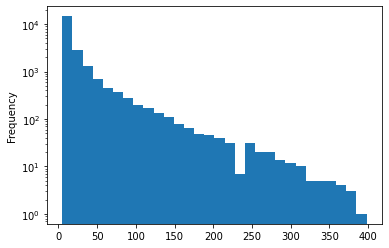

In [14]:
data["nombre"].plot.hist(log=True, bins=30);

#### Aggrégation & tri de valeurs



Les données fournis par le fichier sont désordonnées aussi bien du point de vue des années que des
prénoms. Nous pouvons trier ces données en les ordonnant temporellement à l'aide de la fonction
`sort_values()`



In [15]:
data.sort_values(by="annee")

,nombre,sexe,annee,prenoms
4174,12,F,2004,Nada
3002,5,M,2004,Lionel
3013,13,F,2004,Maïmouna
9457,14,F,2004,Oumou
5170,7,M,2004,Malick
...,...,...,...,...
14837,156,M,2020,Gaspard
14838,9,F,2020,Hélène
14843,26,F,2020,Théa
14803,36,F,2020,Hanna


L'argument `by` peut tout à la fois prendre le nom d'une colonne ou une liste de noms de colonnes afin de
réaliser un tri successif selon chaque colonne. Ainsi pour trier par année puis, de façon
décroissante, par nombre, nous pouvons écrire



In [16]:
data.sort_values(by=["annee", "nombre"], ascending=False)

,nombre,sexe,annee,prenoms
21,312,M,2020,Gabriel
17278,285,M,2020,Adam
19504,252,M,2020,Raphaël
16588,246,M,2020,Louis
16131,242,M,2020,Arthur
...,...,...,...,...
20661,5,F,2004,Cynthia
20665,5,F,2004,Fantine
20671,5,F,2004,Jessie
20672,5,M,2004,Kamil


On peut également grouper les valeurs selon une colonne. La fonction `groupby()` permet, par exemple,
de regrouper les valeurs par année et d'extraire par la suite le nombre total de naissance par année



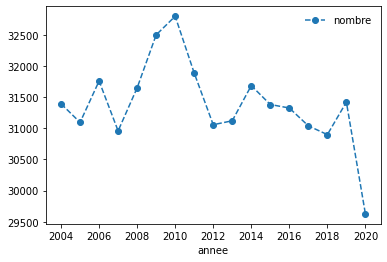

In [17]:
data.groupby("annee").sum().plot(style="--o");

On peut également regrouper les naissances en fonction de l'année et du sexe des enfants



In [18]:
data1 = data.groupby(["annee", "sexe"]).sum()
data1

nombre
annee sexe        
2004  F      14791
      M      16601
2005  F      14890
      M      16203
2006  F      15107
      M      16650
2007  F      14604
      M      16353
2008  F      15161
      M      16486
2009  F      15642
      M      16855
2010  F      15699
      M      17097
2011  F      15267
      M      16618
2012  F      14662
      M      16394
2013  F      14797
      M      16322
2014  F      15076
      M      16607
2015  F      15043
      M      16337
2016  F      14968
      M      16356
2017  F      14724
      M      16314
2018  F      14793
      M      16104
2019  F      14959
      M      16460
2020  F      14221
      M      15404

En groupant les données selon deux catégories (Année, Sexe), on obtient un nouvel objet `DataFrame`
dont les indices sont des couples (Année, Sexe)



In [19]:
data1.index

MultiIndex([(2004, 'F'),
            (2004, 'M'),
            (2005, 'F'),
            (2005, 'M'),
            (2006, 'F'),
            (2006, 'M'),
            (2007, 'F'),
            (2007, 'M'),
            (2008, 'F'),
            (2008, 'M'),
            (2009, 'F'),
            (2009, 'M'),
            (2010, 'F'),
            (2010, 'M'),
            (2011, 'F'),
            (2011, 'M'),
            (2012, 'F'),
            (2012, 'M'),
            (2013, 'F'),
            (2013, 'M'),
            (2014, 'F'),
            (2014, 'M'),
            (2015, 'F'),
            (2015, 'M'),
            (2016, 'F'),
            (2016, 'M'),
            (2017, 'F'),
            (2017, 'M'),
            (2018, 'F'),
            (2018, 'M'),
            (2019, 'F'),
            (2019, 'M'),
            (2020, 'F'),
            (2020, 'M')],
           names=['annee', 'sexe'])

La fonction `unstack()` permet alors de transformer cet objet afin de disposer du nombre de naissances
par sexe en fonction de l'année



In [20]:
data1.unstack()

nombre       
sexe       F      M
annee              
2004   14791  16601
2005   14890  16203
2006   15107  16650
2007   14604  16353
2008   15161  16486
2009   15642  16855
2010   15699  17097
2011   15267  16618
2012   14662  16394
2013   14797  16322
2014   15076  16607
2015   15043  16337
2016   14968  16356
2017   14724  16314
2018   14793  16104
2019   14959  16460
2020   14221  15404

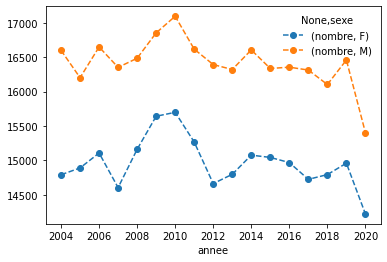

In [21]:
data1.unstack().plot(style="--o");

Finalement, pour trouver les noms les plus utilisés en fonction des années et du sexe de l'enfant,
on peut utiliser la fonction `max()` qui retourne, après avoir groupé les données, les valeurs
maximales **par colonne**



In [22]:
data.groupby(["annee", "sexe"]).max()

nombre   prenoms
annee sexe                  
2004  F        268    Émilie
      M        320  Zinedine
2005  F        283       Éva
      M        329      Éric
2006  F        282       Éva
      M        314   Étienne
2007  F        265       Éva
      M        311      Éric
2008  F        288       Éva
      M        316     Émile
2009  F        322       Éva
      M        350     Éthan
2010  F        335       Éva
      M        398      Éric
2011  F        306       Éva
      M        374     Émile
2012  F        307       Éva
      M        371   Étienne
2013  F        346       Éva
      M        381   Étienne
2014  F        310       Éva
      M        369     Éthan
2015  F        292       Éva
      M        356   Étienne
2016  F        291       Éva
      M        370   Étienne
2017  F        221       Éva
      M        379   Étienne
2018  F        226       Éva
      M        338  Ézéchiel
2019  F        223       Éva
      M        371   Étienne
2020  F        208       Éva
      M        312   Étienne

Les prénoms affichés correspondent aux valeurs "maximales" soit, pour des chaines de caractères, au
tri alphabétique : Zinédine n'est pas le prénom le plus utilisé en 2004. En revanche, le nombre
maximal de fois où un prénom a été donné correspond bien aux valeurs portées par la colonne
"Nombre". Il s'agit donc pour ces valeurs de trouver les prénoms associés. On peut alors chercher
les indices correspondant à ces valeurs maximales *via* la fonction `idxmax()`



In [23]:
data.groupby(["annee", "sexe"]).idxmax()

/home/garrido/.local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


nombre
annee sexe        
2004  F       3613
      M        554
2005  F        683
      M       5604
2006  F      20791
      M       5625
2007  F       1638
      M      20300
2008  F       8234
      M       7239
2009  F       6753
      M       5550
2010  F       6490
      M       6376
2011  F       4609
      M       7048
2012  F      21228
      M       8368
2013  F      16885
      M       8826
2014  F      12720
      M      19715
2015  F       7787
      M       6590
2016  F       8906
      M       5901
2017  F      21515
      M       6657
2018  F      16390
      M      15655
2019  F      21607
      M      19425
2020  F      17279
      M         21

puis d'afficher ces lignes



In [24]:
data.iloc[data.groupby(["annee", "sexe"]).idxmax()["nombre"]]

/home/garrido/.local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


,nombre,sexe,annee,prenoms
3613,268,F,2004,Inès
554,320,M,2004,Alexandre
683,283,F,2005,Inès
5604,329,M,2005,Alexandre
20791,282,F,2006,Emma
5625,314,M,2006,Raphaël
1638,265,F,2007,Louise
20300,311,M,2007,Gabriel
8234,288,F,2008,Louise
7239,316,M,2008,Gabriel


#### Pivoter les données



Il est possible de transposer les données de telle sorte à inverser indices et colonnes. On peut
également utiliser la fonction `pivot_table()` pour déterminer la façon dont va pivoter le
`DataFrame`. Cette fonction prend 3 arguments :

-   `values` indique les valeurs selon lesquelles réaliser le pivot de la table de données,
-   `columns` permet de spécifier les valeurs qui deviendront les colonnes dans la nouvelle table,
-   `index` permet de spécifier ce qui deviendra l'index de la table pivotée.

On peut, par exemple, représenter le nombre de prénoms attribués (`values`) en fonction de l'année
(`columns`) pour chaque prénoms (`index`)



In [25]:
data.pivot_table(values="nombre", index="prenoms", columns="annee")

annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
prenoms,,,,,,,,,,,,,,,,,
Aaliyah,NaN,NaN,NaN,NaN,5.0,8.0,7.0,NaN,11.0,13.0,12.0,11.0,9.0,9.0,11.0,7.0,10.0
Aaron,55.0,52.0,66.0,76.0,92.0,76.0,86.0,80.0,92.0,83.0,90.0,73.0,97.0,116.0,77.0,103.0,98.0
Abby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,6.0,NaN,9.0
Abd,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
Abdallah,7.0,9.0,6.0,5.0,10.0,11.0,13.0,6.0,13.0,9.0,18.0,9.0,10.0,8.0,15.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Éric,NaN,5.0,5.0,9.0,NaN,NaN,7.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Éthan,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,5.0,6.0,5.0,5.0,NaN,NaN
Étienne,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,6.0,5.0,NaN,13.0,5.0,5.0,6.0,6.0,9.0


On note qu'en l'absence de valeurs, `pandas` associe la valeur *Not a Number*, valeur que l'on peut
ignorer à l'aide de la fonction `dropna()` ou que l'on peut modifier de la façon suivante



In [26]:
data.pivot_table(values="nombre", index="prenoms", columns="annee").fillna(0)

annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
prenoms,,,,,,,,,,,,,,,,,
Aaliyah,0.0,0.0,0.0,0.0,5.0,8.0,7.0,0.0,11.0,13.0,12.0,11.0,9.0,9.0,11.0,7.0,10.0
Aaron,55.0,52.0,66.0,76.0,92.0,76.0,86.0,80.0,92.0,83.0,90.0,73.0,97.0,116.0,77.0,103.0,98.0
Abby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,6.0,0.0,9.0
Abd,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Abdallah,7.0,9.0,6.0,5.0,10.0,11.0,13.0,6.0,13.0,9.0,18.0,9.0,10.0,8.0,15.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Éric,0.0,5.0,5.0,9.0,0.0,0.0,7.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Éthan,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,6.0,5.0,5.0,0.0,0.0
Étienne,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.0,13.0,5.0,5.0,6.0,6.0,9.0


Nous avons ainsi accès à la tendance annuelle d'un prénom en le sélectionnant



In [27]:
data.pivot_table(values="nombre", index="prenoms", columns="annee").fillna(0).loc[["Patrick", "Pascal"]].astype(int)

annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
prenoms,,,,,,,,,,,,,,,,,
Patrick,10,8,15,7,0,7,0,6,6,0,0,6,0,0,0,0,0
Pascal,10,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0


Le résultat graphique est encore plus parlant



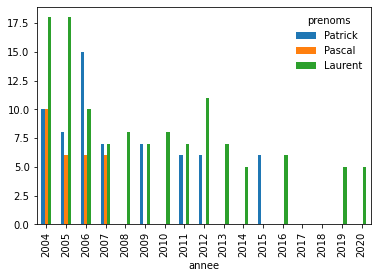

In [28]:
data.pivot_table(values="nombre", index="prenoms", columns="annee").fillna(0).loc[["Patrick", "Pascal", "Laurent"]].T.plot.bar();

### Analyse, tri et manipulation de données temporelles



`pandas` permet de manipuler des données temporelles en facilitant notamment la lecture des dates,
heures, &#x2026; Nous allons dans cette seconde partie étudier la distribution temporelle correspondant à
la traversée du pont Fremont à Seattle en vélo. Ce notebook est une application directe du chapitre
["*Working with time series*"](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Example:-Visualizing-Seattle-Bicycle-Counts).

Les données relevées par la ville de Seattle sont consultables à cette [adresse](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k). Nous pouvons
directement les charger dans `DataFrame` à l'aide la fonction `read_csv()` à laquelle nous indiquons
utiliser les dates de relevés comme indices



In [29]:
data = pd.read_csv("https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD", parse_dates=True, index_col="Date")
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


Les données donne la fréquence horaire de traversée d'Est en Ouest du pont Fremont. Afin de
faciliter la manipulation des données nous allons renommer chaque colonne



In [30]:
data.columns = ["Total", "East", "West"]
data.shape

(146534, 3)

#### Visualisation des données



Afin d'avoir un rapide aperçu statistique, on peut toujours utiliser la fonction `describe()`



ou visualiser le nombre de traversée en fonction du temps



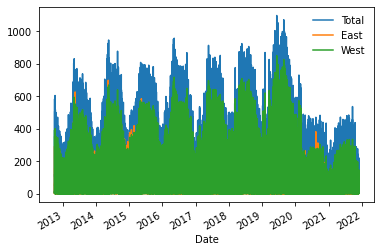

In [31]:
data.plot();

Le taux horaire de données est tel qu'il convient de rééchantillonner les valeurs par semaine



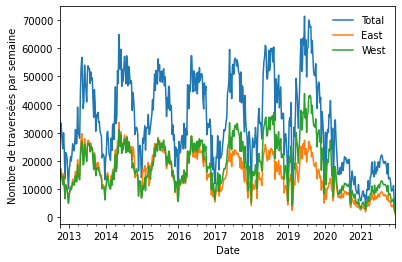

In [32]:
weekly = data.resample("W").sum()
weekly.plot().set_ylabel("Nombre de traversées par semaine");

Les données laissent clairement apparaître des variations été/hiver de même qu'une augmentation du
trafic depuis l'ouest vers l'est depuis 2017.

Nous pouvons également lisser ces courbes à l'aide d'une moyenne glissante sur la base d'un
échantillonnage journalier. On utilise à cette fin une moyenne glissante sur 30 jours à l'aide de la
fonction `rolling()`



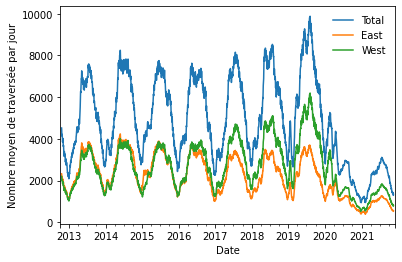

In [33]:
daily = data.resample("D").sum()
daily.rolling(30, center=True).mean().plot().set_ylabel("Nombre moyen de traversée par jour");

On peut finalement faire ce même exercice en utilisant une fonction gaussienne afin de minimiser
encore les variations (*Kernel Density Estimation*)



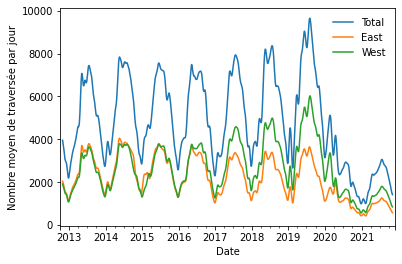

In [34]:
daily.rolling(50, center=True, win_type="gaussian").mean(std=10).plot().set_ylabel("Nombre moyen de traversée par jour");

#### Variation du trafic par heure



À l'image des prénoms, il est possible de grouper les données par heure afin d'estimer les
variations moyennes au cours d'une journée



In [35]:
by_time = data.groupby(data.index.time)
by_time.describe()

Total                                                            \
           count        mean         std  min    25%    50%    75%     max   
00:00:00  6106.0   10.970521    8.209328  0.0    5.0    9.0   15.0   124.0   
01:00:00  6106.0    5.799541    5.168617  0.0    2.0    5.0    8.0    86.0   
02:00:00  6092.0    3.810243    3.493283  0.0    1.0    3.0    5.0    61.0   
03:00:00  6106.0    2.812807    3.355952  0.0    1.0    2.0    4.0   144.0   
04:00:00  6106.0    6.393547    4.519596  0.0    3.0    6.0    9.0    73.0   
05:00:00  6106.0   24.915493   16.622269  0.0   10.0   24.0   36.0   154.0   
06:00:00  6106.0   86.835572   63.112210  0.0   24.0   85.5  131.0   333.0   
07:00:00  6106.0  217.620701  167.794810  0.0   50.0  204.0  349.0   841.0   
08:00:00  6106.0  307.867999  223.131265  0.0   82.0  304.0  494.0   892.0   
09:00:00  6104.0  182.087647  101.482574  0.0   95.0  175.0  264.0   547.0   
10:00:00  6104.0   99.539974   43.980512  0.0   68.0   96.0  128.0   668.0   
11:00:00  6104.0   90.167595   51.528642  1.0   54.0   81.0  113.0   679.0   
12:00:00  6104.0   96.696592   58.243836  0.0   56.0   86.0  121.0   637.0   
13:00:00  6106.0  103.476908   61.779568  0.0   60.0   94.0  129.0   545.0   
14:00:00  6105.0  112.990827   63.539252  0.0   67.0  104.0  142.0   489.0   
15:00:00  6105.0  142.579361   66.002477  2.0   92.0  140.0  186.0   459.0   
16:00:00  6105.0  229.783129  119.643894  2.0  142.0  219.0  316.0   588.0   
17:00:00  6105.0  376.389517  248.494558  0.0  157.0  358.0  571.0  1097.0   
18:00:00  6105.0  256.870762  166.660153  0.0  118.0  246.0  378.0   735.0   
19:00:00  6105.0  128.064046   83.561878  0.0   64.0  115.0  180.0   403.0   
20:00:00  6105.0   73.642752   49.730176  0.0   35.0   62.0  102.0   272.0   
21:00:00  6105.0   47.039476   34.484382  0.0   23.0   40.0   64.0   620.0   
22:00:00  6105.0   30.552007   23.141368  0.0   16.0   26.0   41.0   523.0   
23:00:00  6105.0   20.035872   17.983916  0.0   11.0   17.0   26.0   392.0   

            East              ...                   West              \
           count        mean  ...     75%    max   count        mean   
00:00:00  6106.0    4.610383  ...    6.00   43.0  6106.0    6.360138   
01:00:00  6106.0    2.580740  ...    4.00   38.0  6106.0    3.218801   
02:00:00  6092.0    1.815660  ...    3.00   54.0  6092.0    1.994583   
03:00:00  6106.0    1.428922  ...    2.00  138.0  6106.0    1.383885   
04:00:00  6106.0    3.334261  ...    5.00   20.0  6105.0    3.059787   
05:00:00  6106.0   15.043236  ...   23.00  103.0  6106.0    9.872257   
06:00:00  6106.0   51.491811  ...   78.00  262.0  6106.0   35.343760   
07:00:00  6106.0  133.641991  ...  212.00  698.0  6106.0   83.978709   
08:00:00  6106.0  179.516050  ...  293.00  690.0  6106.0  128.351949   
09:00:00  6104.0   97.580931  ...  144.25  302.0  6104.0   84.506717   
10:00:00  6104.0   51.354849  ...   67.00  381.0  6104.0   48.185125   
11:00:00  6104.0   46.227883  ...   59.00  214.0  6104.0   43.939712   
12:00:00  6104.0   48.531291  ...   61.00  305.0  6104.0   48.165301   
13:00:00  6106.0   51.064527  ...   64.00  312.0  6106.0   52.412381   
14:00:00  6105.0   53.572482  ...   67.00  263.0  6105.0   59.418346   
15:00:00  6105.0   63.107944  ...   81.00  246.0  6105.0   79.471417   
16:00:00  6105.0   82.906798  ...  112.00  213.0  6105.0  146.876331   
17:00:00  6105.0  110.235381  ...  158.00  289.0  6105.0  266.154136   
18:00:00  6105.0   87.571499  ...  126.00  271.0  6105.0  169.299263   
19:00:00  6105.0   48.755446  ...   70.00  312.0  6105.0   79.308600   
20:00:00  6105.0   29.989517  ...   43.00  121.0  6105.0   43.653235   
21:00:00  6105.0   20.477150  ...   28.00  541.0  6105.0   26.562326   
22:00:00  6105.0   13.113186  ...   18.00  172.0  6105.0   17.438821   
23:00:00  6105.0    8.161507  ...   11.00  144.0  6105.0   11.874365   

                                                      
                 std  min   25%    50%    75%    max  

et de représenter graphiquement ces données



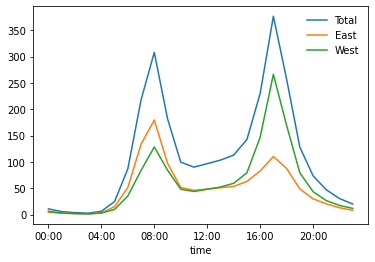

In [36]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.mean().plot(xticks=hourly_ticks);

La distribution est bimodale est fonction des heures de travail (8h le matin, 17h l'après midi) et
les traversées s'inversent bien (la direction est/ouest correspond au trafic agglomération vers
centre-ville)

Nous pouvons également nous intéresser à la fréquence de traversée en fonction du jour et vérifier
que l'utilisation du vélo se fait majoritairement pour se rendre au travail



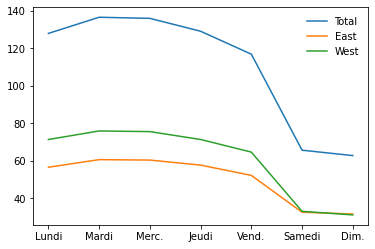

In [37]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Lundi", "Mardi", "Merc.", "Jeudi", "Vend.", "Samedi", "Dim."]
by_weekday.plot();

Finalement, nous pouvons grouper les deux informations heure et jour et comparer les distributions
en fonction du jour de la semaine



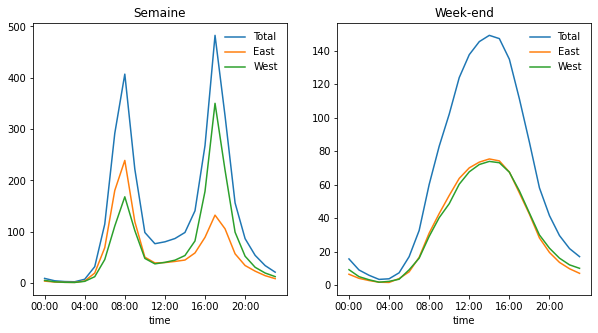

In [38]:
weekend = np.where(data.index.weekday < 5, "Semaine", "Week-end")
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10,5))
by_time.loc["Semaine"].plot(ax=ax[0], title="Semaine", xticks=hourly_ticks)
by_time.loc["Week-end"].plot(ax=ax[1], title="Week-end", xticks=hourly_ticks);